# Rregresion lineal regularizada
**Inteligencia artificial** <br>
**Hoja de trabajo no. 1** <br>
Diego Sevilla <br>
17238

**Se importan librerias.**

In [79]:
import numpy as np #para operaciones con matrices y vectores
from numpy import genfromtxt # para obetener los datos
from matplotlib import pyplot as plt #para graficos
from sklearn.model_selection import train_test_split ##para particiones de los datos

#para tabla de correlacion entre variables
from pandas import DataFrame 
import seaborn as sn

**Cargado de datos**

In [80]:
my_data = genfromtxt('Admission_Predict.csv', delimiter=',')
print(my_data)

[[   nan    nan    nan ...    nan    nan    nan]
 [  1.   337.   118.   ...   9.65   1.     0.92]
 [  2.   324.   107.   ...   8.87   1.     0.76]
 ...
 [398.   330.   116.   ...   9.45   1.     0.91]
 [399.   312.   103.   ...   8.78   0.     0.67]
 [400.   333.   117.   ...   9.66   1.     0.95]]


In [81]:
data = np.delete(my_data,0, 0) #Se elimina primera fila con titulos
print(data)

[[  1.   337.   118.   ...   9.65   1.     0.92]
 [  2.   324.   107.   ...   8.87   1.     0.76]
 [  3.   316.   104.   ...   8.     1.     0.72]
 ...
 [398.   330.   116.   ...   9.45   1.     0.91]
 [399.   312.   103.   ...   8.78   0.     0.67]
 [400.   333.   117.   ...   9.66   1.     0.95]]


**Particion de los datos en 0.75 para train y 0.25 para test**

In [82]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42)

In [83]:
print (data_train)

[[248.   311.   104.   ...   8.48   0.     0.71]
 [111.   305.   108.   ...   8.48   0.     0.61]
 [ 17.   317.   107.   ...   8.7    0.     0.66]
 ...
 [271.   306.   105.   ...   8.22   1.     0.72]
 [349.   302.    99.   ...   7.25   0.     0.57]
 [103.   314.   106.   ...   8.25   0.     0.62]]


In [84]:
print (data_test)

[[2.10e+02 3.01e+02 1.04e+02 3.00e+00 3.50e+00 4.00e+00 8.12e+00 1.00e+00
  6.80e-01]
 [2.81e+02 3.11e+02 1.02e+02 3.00e+00 4.50e+00 4.00e+00 8.64e+00 1.00e+00
  6.80e-01]
 [3.40e+01 3.40e+02 1.14e+02 5.00e+00 4.00e+00 4.00e+00 9.60e+00 1.00e+00
  9.00e-01]
 [2.11e+02 3.25e+02 1.08e+02 4.00e+00 4.50e+00 4.00e+00 9.06e+00 1.00e+00
  7.90e-01]
 [9.40e+01 3.01e+02 9.70e+01 2.00e+00 3.00e+00 3.00e+00 7.88e+00 1.00e+00
  4.40e-01]
 [8.50e+01 3.40e+02 1.15e+02 5.00e+00 4.50e+00 4.50e+00 9.45e+00 1.00e+00
  9.40e-01]
 [3.30e+02 2.97e+02 9.60e+01 2.00e+00 2.50e+00 1.50e+00 7.89e+00 0.00e+00
  4.30e-01]
 [9.50e+01 3.03e+02 9.90e+01 3.00e+00 2.00e+00 2.50e+00 7.66e+00 0.00e+00
  3.60e-01]
 [2.67e+02 3.12e+02 1.05e+02 2.00e+00 2.00e+00 2.50e+00 8.45e+00 0.00e+00
  7.20e-01]
 [1.27e+02 3.23e+02 1.13e+02 3.00e+00 4.00e+00 3.00e+00 9.32e+00 1.00e+00
  8.50e-01]
 [1.00e+01 3.23e+02 1.08e+02 3.00e+00 3.50e+00 3.00e+00 8.60e+00 0.00e+00
  4.50e-01]
 [3.62e+02 3.34e+02 1.16e+02 4.00e+00 4.00e+00 3.50e+0

##### Los valores para el vector Y seran de la variable: 
* Chance of admit <br>

In [85]:
Y = data_train[:, 8]

In [86]:
print(Y)

[0.71 0.61 0.66 0.61 0.79 0.68 0.62 0.71 0.73 0.62 0.77 0.53 0.56 0.46
 0.86 0.48 0.46 0.93 0.74 0.8  0.65 0.68 0.65 0.42 0.97 0.85 0.73 0.75
 0.64 0.81 0.84 0.81 0.77 0.82 0.71 0.77 0.82 0.71 0.84 0.8  0.64 0.78
 0.56 0.77 0.73 0.94 0.42 0.69 0.78 0.69 0.75 0.71 0.78 0.93 0.52 0.86
 0.57 0.96 0.54 0.67 0.38 0.64 0.92 0.64 0.63 0.74 0.47 0.68 0.83 0.71
 0.34 0.78 0.61 0.48 0.97 0.63 0.86 0.7  0.68 0.95 0.58 0.8  0.57 0.68
 0.57 0.7  0.67 0.74 0.58 0.78 0.64 0.75 0.89 0.72 0.72 0.75 0.94 0.59
 0.73 0.65 0.75 0.97 0.8  0.82 0.81 0.92 0.52 0.84 0.81 0.89 0.76 0.62
 0.73 0.69 0.71 0.45 0.51 0.7  0.96 0.89 0.91 0.81 0.93 0.76 0.8  0.72
 0.73 0.84 0.72 0.69 0.66 0.91 0.86 0.76 0.94 0.68 0.67 0.85 0.56 0.74
 0.71 0.78 0.74 0.72 0.54 0.92 0.76 0.91 0.77 0.76 0.79 0.63 0.72 0.58
 0.91 0.57 0.55 0.76 0.7  0.84 0.52 0.78 0.88 0.46 0.68 0.92 0.79 0.49
 0.75 0.42 0.56 0.6  0.9  0.62 0.72 0.49 0.76 0.63 0.85 0.73 0.65 0.76
 0.7  0.71 0.63 0.79 0.96 0.89 0.9  0.93 0.47 0.89 0.91 0.73 0.73 0.79
 0.44 

**En el caso del vector X... se graficaran las variables para determinar su tipo.**

### Graficos X contra Y

**GRE Score**

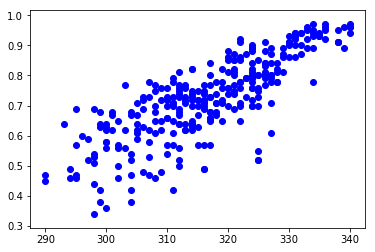

In [87]:
GRE = data_train[:, 1]
plt.scatter(GRE,Y,label='GRE',color='blue')

**TOEFL Score**

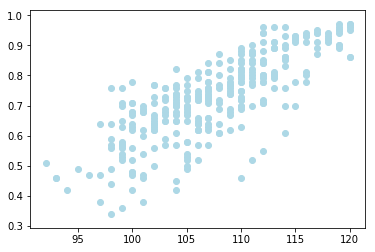

In [88]:
TOEFL = data_train[:, 2]
plt.scatter(TOEFL,Y,label='TOEFL',color='lightblue')

**University Rating**

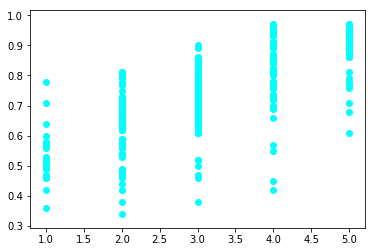

In [89]:
UR = data_train[:, 3]
plt.scatter(UR,Y,label='UR',color='cyan')

**SOP**

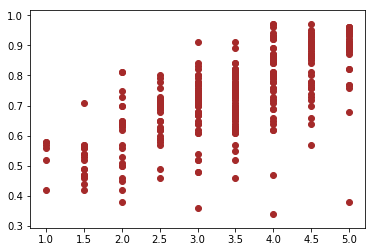

In [90]:
SOP = data_train[:, 4]
plt.scatter(SOP,Y,label='SOP',color='brown')

**LOR**

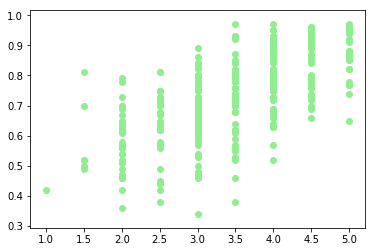

In [91]:
LOR = data_train[:, 5]
plt.scatter(LOR,Y,label='LOR',color='lightgreen')

**CGPA**

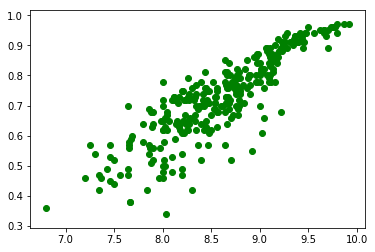

In [92]:
CGPA = data_train[:, 6]
plt.scatter(CGPA,Y,label='CGPA',color='green')

### Normalidad de las variables

**GRE Score**

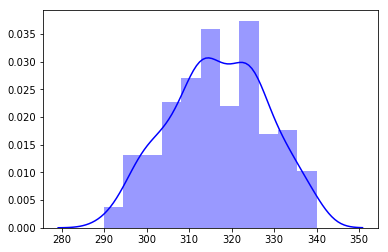

In [93]:
sn.distplot(GRE,color="blue")
plt.show()

**TOEFL Score**

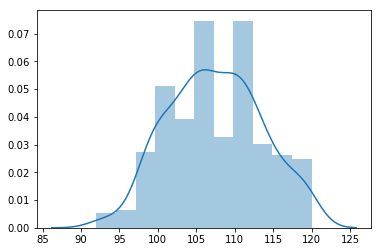

In [94]:
sn.distplot(TOEFL) # lightblue
plt.show()

**University Rating**

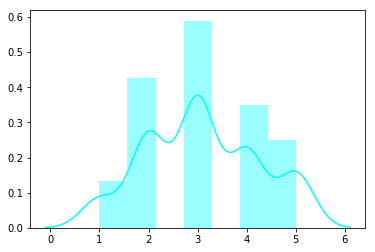

In [95]:
sn.distplot(UR,color="cyan")
plt.show()

**SOP**

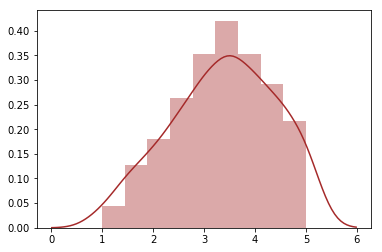

In [96]:
sn.distplot(SOP,color="brown")
plt.show()

**LOR**

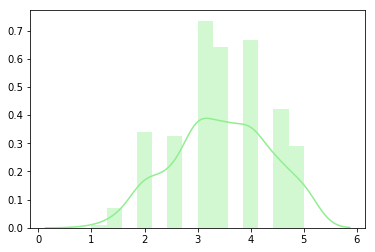

In [97]:
sn.distplot(LOR,color="lightgreen")
plt.show()

**CGPA**

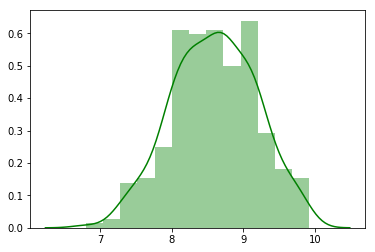

In [98]:
sn.distplot(CGPA,color="green")
plt.show()

**La distribucion de las variables cuantitativas muestra formas parecidas a la campana de Gauss <br>
por lo cual se puede asumir que son distribuciones normales.**

Para el vector X se pueden utilizar las variables:
* GRE
* TOEFL
* CGPA <br><br>
****Las variables LOR y SOP son variables discretas, y la variable UR (University Rating) es <br> 
categorica. Sin embargo Antes de decidir que variables usar o descartar es importante hacer una <br>
correlacion para determinar que features podriamos usar en conjunto para un modelo especifico.**

## Correlacion entre variables

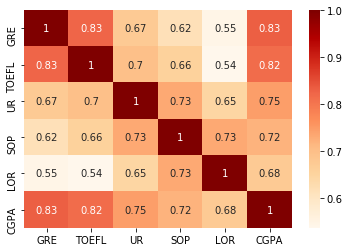

In [99]:
data_pd = {
    'GRE': GRE,
    'TOEFL': TOEFL,
    'UR': UR,
    'SOP': SOP,    
    'LOR': LOR,
    'CGPA': CGPA
    }
df = DataFrame(data_pd,columns=['GRE','TOEFL','UR','SOP','LOR','CGPA'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,cmap="OrRd")

**Segun la matriz de correlacion se observa que:**
* TOEFL y GRE tienen una correlacion de 0.83.
* CGPA y GRE tienen una correlacion de 0.83.
* CGPA y TOEFL tienen una correlacion de 0.82. <br>
Asi tambien se observa 0.75 entre UR y CGPA. <br>
Se haran modelos individuales por cada variable, sin embargo podria ser interesante usar ambos <br>
features para algun modelo.

## FUNCIONES

### Descenso de gradiente

In [100]:
def gradient_descent_reg(X, y, theta_0, cost, cost_derivate, alpha, treshold, max_iter, lamvda):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta,lamvda)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta,lamvda)
        i += 1
        costs.append(cost(X, y, theta,lamvda))
        gradient_norms.append(cost_derivate(X, y, theta,lamvda))
    return theta, costs, gradient_norms

### Costo lineal

In [101]:
##############LINEAR COST
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)

##############LINEAR COST + REGULARIZATION
def linear_cost_reg(X, y, theta, lamvda=1):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    tetaj = h**2
    return ( sq.sum() + (lamvda*tetaj.sum()) ) / (2 * m)

### Derivadas de costo

In [102]:
#########LINEAR COST DERIVATE
def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m

#########LINEAR COST DERIVATE + REGULARIZATION
def linear_cost_derivate_reg(X, y, theta,lamvda=1):
    h = np.matmul(X, theta)
    m, _ = X.shape
    tetaj = h;
    vlambda = np.empty(h.size)
    vlambda.fill(lamvda)
    return  ( np.matmul((h - y).T, X).T + np.matmul(vlambda,tetaj).T) / m

### Random de decimales para pruebas con lambda

In [103]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

## DATA SETS

### Tests 
En este apartado se utiliza un for() con un range de decimales para probar valores de lambda en algun modelo.

In [104]:
TRAINING_ELEMENTS = 300

In [105]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        #GRE,
        #TOEFL,
        #UR,
        #SOP,
        #LOR,
        #CGPA,
        #GRE*TOEFL,
        #CGPA*GRE,
        #CGPA*TOEFL,
        CGPA*UR,
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))
(X, Y) = dataset_1
m, n = X.shape

#alpha para 1 feature: 0.000001
#alpha para 2 features: 0.000000001

In [59]:
theta_0 = np.random.rand(n, 1)
theta_0 = np.array([[0.45], [0.01306262]])

('THETA:', array([[0.45013625],
       [0.01005001]]))
('lambda:', 0)


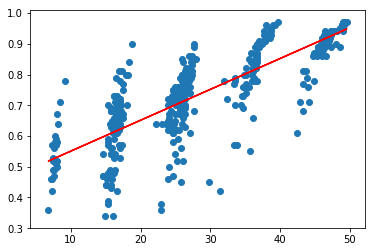

('THETA:', array([[0.43318794],
       [0.01036925]]))
('lambda:', 0.25)


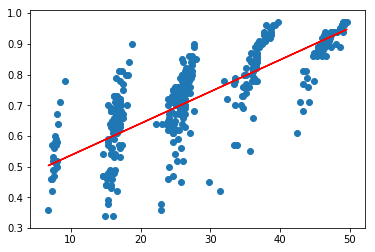

('THETA:', array([[0.39977377],
       [0.01121251]]))
('lambda:', 0.5)


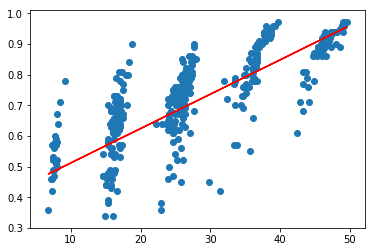

('THETA:', array([[0.35074745],
       [0.01255485]]))
('lambda:', 0.75)


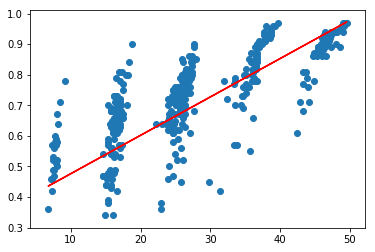

KeyboardInterrupt: 

In [60]:
##Ejemplo de test para valores de lambda con el feature deseado
for i in frange(0,50,0.25):
    theta, costs, gradient_norms = gradient_descent_reg(
        X,
        Y,
        theta_0,
        linear_cost_reg,
        linear_cost_derivate_reg,
        alpha=0.000001,
        treshold=0.000001,
        max_iter=100000,
        lamvda=i
    )
    print ('THETA:', theta)
    print ('lambda:', i)
    # plt.plot(np.arange(len(costs)), costs)
    # Plot training data
    plt.plot(X[:, 1], np.matmul(X, theta), color='red')
    plt.scatter(X[:, 1], Y)

    plt.show()

### **Los valores de lambda utilizados en los modelos siguientes se obtuvieron de correr la prueba hasta hayar el valor que ajustara mejor el modelo a los datos.

### Training para GRE

In [106]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        GRE
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

In [107]:
theta_0 = np.array([[-2.67141544],[0.01068391]])
#Lambda = 4.75

('THETA:', array([[-3.00982189],
       [ 0.01175453]]))


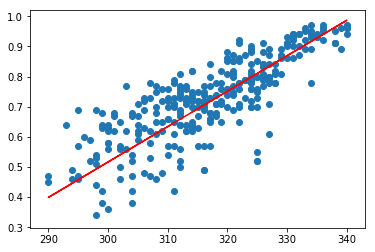

In [108]:
theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000001,
    treshold=0.00001,
    max_iter=100000,
    lamvda=4.75
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Training para TOEFL

In [41]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        TOEFL
        #x ** 3,
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

In [42]:
theta_0 = np.array([[-1.68020707],[ 0.02216102]])
#lambda = 3.5

('THETA:', array([[-1.92315614],
       [ 0.02441561]]))


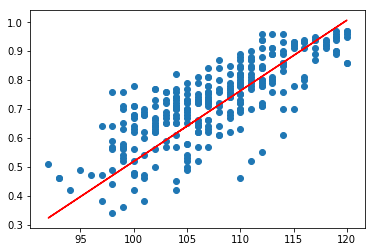

In [43]:
theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000001,
    treshold=0.00001,
    max_iter=100000,
    lamvda=3.5
)

print ('THETA:', theta)
# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()
#20

### Training para CGPA*GRE

In [47]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        CGPA*GRE,
        #x ** 3,
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))
(X, Y) = dataset_1
m, n = X.shape

In [48]:
theta_0 = np.array([[-0.5],[ 0.18563249]])
#lambda=2.5

('THETA:', array([[-5.00416317e-01],
       [ 4.49379748e-04]]))


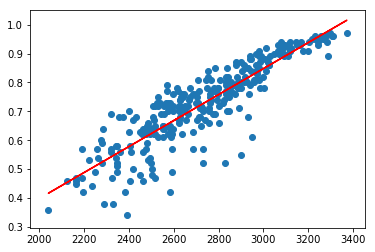

In [49]:
theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000000001,
    treshold=0.000001,
    max_iter=100000,
    lamvda=2.5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Training pra CGPA * TOEFL

In [36]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        CGPA*TOEFL,
        #x ** 3,
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))
(X, Y) = dataset_1
m, n = X.shape

In [37]:
theta_0 = np.array([[-0.3 ],[0.00063577]])
#lambda=5

('THETA:', array([[-0.30813837],
       [ 0.00111018]]))


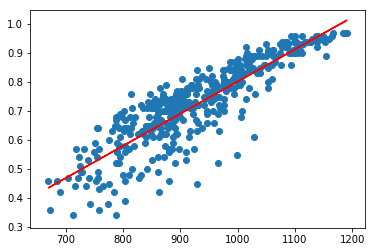

In [43]:
theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000000001,
    treshold=0.000001,
    max_iter=100000,
    lamvda=5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Training para CGPA*UR

In [50]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        CGPA*UR,
        #x ** 3,
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))
(X, Y) = dataset_1
m, n = X.shape

In [123]:
theta_0 = np.array([[0.43318794], [0.01036925]])
#lambda=5

('THETA:', array([[0.43283508],
       [0.01004915]]))


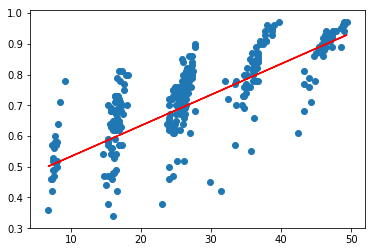

In [52]:
theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000000001,
    treshold=0.000001,
    max_iter=100000,
    lamvda=5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Pruebas con data_train

In [121]:
GRE = data_test[:, 1]
TOEFL = data_test[:, 2]
UR = data_test[:, 3]
CGPA = data_test[:, 6]

Y = data_test[:, 8]

## Prueba para GRE

In [111]:
TRAINING_ELEMENTS = 100

('THETA:', array([[-3.0066094 ],
       [ 0.01172913]]))


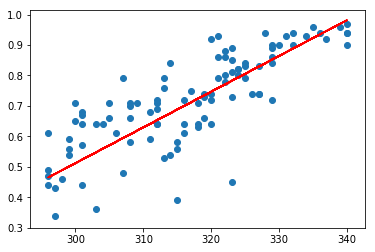

In [117]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        GRE
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

theta_0 = np.array([[-2.67141544],[0.01068391]])
#Lambda = 4.75

theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000001,
    treshold=0.00001,
    max_iter=100000,
    lamvda=4.75
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Prueba para TOEFL

('THETA:', array([[-1.92114417],
       [ 0.02439829]]))


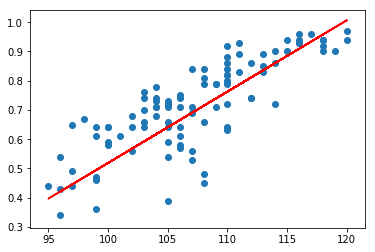

In [118]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        TOEFL
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

theta_0 = np.array([[-1.68020707],[ 0.02216102]])
#lambda = 3.5

theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000001,
    treshold=0.00001,
    max_iter=100000,
    lamvda=3.5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Prueba para CGPA*GRE

('THETA:', array([[-5.00413904e-01],
       [ 4.45744200e-04]]))


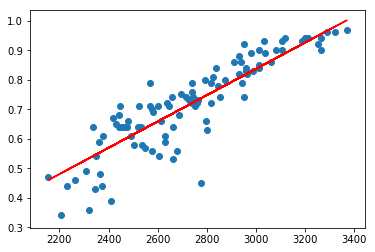

In [119]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        CGPA*GRE
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

theta_0 = np.array([[-0.5],[ 0.18563249]])
#lambda=2.5

theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000000001,
    treshold=0.000001,
    max_iter=100000,
    lamvda=2.5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### Prueba para CGPA*UR

('THETA:', array([[0.43283432],
       [0.01004298]]))


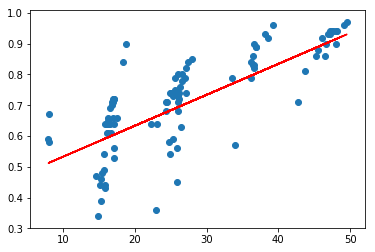

In [124]:
X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        CGPA*UR
    )
).T

#El vector Y se definio mas arriba
dataset_1 = (X, Y.reshape(TRAINING_ELEMENTS, 1))

##TRAINING DATA
(X, Y) = dataset_1
m, n = X.shape

theta_0 = np.array([[0.43318794], [0.01036925]])
#lambda=5

theta, costs, gradient_norms = gradient_descent_reg(
    X,
    Y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    alpha=0.000000001,
    treshold=0.000001,
    max_iter=100000,
    lamvda=5
)

print ('THETA:', theta)

# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], Y)

plt.show()

### ANALISIS DE HALLAZGOS

**Lanbda y theta** <br>
En valor de lambda fue encontrado con la ayuda de un ciclo for() para probar valores en cada modelo. <br>
Por otro lado, los valores de theta fueron generados al azar en un principio y dependiendo del ajuste <br>
con lambda se settearon dichos valores para cada modelo especifico. <br>

**Training data** <br>
En la seccion de modelos con los datos de entrenamiento se obseva un ajuste de modelo descente. En los <br>
modelos con una feature como el de GRE y el de TOEFL. Tambien en los modelos con multiplicacion de 2 <br> features como el de CGPA*GRE y el de CGPA*UR(University Rating) <br>

**Testing data** <br>
En esta ultima seccion donde se utiliza el otro 25% de la muestra se puede observar que los modelos se <br> ajustan a los datos de forma correcto sin mayores fluctuaciones con excepcion del numero de datos.